TECH JOB ANALYSIS - [OCT 2024 - Mar 2025 (Last updated)] 

In [2]:
'''
Analysis Goals : - 
- Gain insights on job type [full time, part time, contract, etc.]
- Job location 
- Pay range of Jobs
- Amount of Jobs listed on Portals
'''

'\nAnalysis Goals : - \n- Gain insights on job type [full time, part time, contract, etc.]\n- Job location \n- Pay range of Jobs\n- Amount of Jobs listed on Portals\n'

In [3]:
# Import all the libraries/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the data from the Excel file
file_path = r'C:\Users\Kartikay\Desktop\Data Engineering Docs\Tech Jobs\all_jobs.xlsx'
data_csv = pd.read_excel(file_path, sheet_name='Sheet1')

In [5]:
# Added this Non-null, Coun and data type
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94529 entries, 0 to 94528
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0.2           94529 non-null  int64         
 1   Unnamed: 0.1           94529 non-null  int64         
 2   Unnamed: 0             94529 non-null  int64         
 3   id                     94529 non-null  object        
 4   site                   94529 non-null  object        
 5   job_url                94529 non-null  object        
 6   job_url_direct         60491 non-null  object        
 7   title                  94529 non-null  object        
 8   company                93220 non-null  object        
 9   location               94086 non-null  object        
 10  job_type               51639 non-null  object        
 11  date_posted            94529 non-null  datetime64[ns]
 12  salary_source          72422 non-null  object        
 13  i

In [6]:
# Count of missing values per column
data_csv.isnull().sum() 

Unnamed: 0.2                 0
Unnamed: 0.1                 0
Unnamed: 0                   0
id                           0
site                         0
job_url                      0
job_url_direct           34038
title                        0
company                   1309
location                   443
job_type                 42890
date_posted                  0
salary_source            22107
interval                 19340
min_amount               22106
max_amount               22107
currency                 19341
is_remote                30611
job_level                94524
job_function             94524
company_industry         79837
listing_type             60491
emails                   83725
description                  0
company_url              32271
company_url_direct       48697
company_addresses        51493
company_num_employees    51399
company_revenue          56952
company_description      61711
logo_photo_url           49456
banner_photo_url         59859
ceo_name

In [7]:
# Drop the unnecessary columns
data_csv = data_csv.drop(['Unnamed: 0.2','Unnamed: 0.1', 'Unnamed: 0'], axis=1)
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94529 entries, 0 to 94528
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     94529 non-null  object        
 1   site                   94529 non-null  object        
 2   job_url                94529 non-null  object        
 3   job_url_direct         60491 non-null  object        
 4   title                  94529 non-null  object        
 5   company                93220 non-null  object        
 6   location               94086 non-null  object        
 7   job_type               51639 non-null  object        
 8   date_posted            94529 non-null  datetime64[ns]
 9   salary_source          72422 non-null  object        
 10  interval               75189 non-null  object        
 11  min_amount             72423 non-null  float64       
 12  max_amount             72422 non-null  float64       
 13  c

In [8]:
data_csv.head(10)

,id,site,job_url,job_url_direct,title,company,location,job_type,date_posted,salary_source,...,company_addresses,company_num_employees,company_revenue,company_description,logo_photo_url,banner_photo_url,ceo_name,ceo_photo_url,mean_salary,cleaned_description
0,487e95701c0d55b3,indeed,https://www.indeed.com/viewjob?jk=487e95701c0d...,https://jobs.gusto.com/postings/riscpoint-advi...,Cybersecurity Operations Senior Consultant,RISCPoint,"Remote, US",fulltime,2024-10-10,direct_data,...,"2814 Detroit Ave \nCleveland, Ohio 44113, US",11 to 50,NaN,RISCPoint Advisory Group is an industry leader...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,NaN,NaN,120000.0,riscpoint is seeking a conceptual thinker with...
1,679ff0528b73610f,indeed,https://www.indeed.com/viewjob?jk=679ff0528b73...,https://www.marketaxess.com/careers/current-op...,Senior Information Security Engineer (GRC),MarketAxess Holdings,"New York, NY, US",fulltime,2024-10-10,direct_data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175000.0,company description marketaxess is on a journe...
2,41f6f886cd9b9d1d,indeed,https://www.indeed.com/viewjob?jk=41f6f886cd9b...,https://workforcenow.adp.com/mascsr/default/md...,Information System Security Officer II,Global Resource Solutions,"Colorado Springs, CO, US",fulltime,2024-10-10,direct_data,...,Fairfax,51 to 200,$5M to $25M (USD),NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,NaN,NaN,NaN,95880.5,"global resource solutions, inc. (grs) is seeki..."
3,f82f829d7cf62384,indeed,https://www.indeed.com/viewjob?jk=f82f829d7cf6...,https://workforcenow.adp.com/mascsr/default/md...,Cyber Operations Support Specialist,"Cole Engineering Services, Inc","Fort Meade, MD, US",NaN,2024-10-10,direct_data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117500.0,**company overview:** by light professional it...
4,895d9f28e9e5ee10,indeed,https://www.indeed.com/viewjob?jk=895d9f28e9e5...,https://mufgub.wd3.myworkdayjobs.com/MUFG-Care...,"Identity & Access Management, Analyst",MUFG,"Tampa, FL, US",fulltime,2024-10-10,direct_data,...,Tokyo,"10,000+",more than $10B (USD),MUFG (Mitsubishi UFJ Financial Group) is the s...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,Kevin Cronin,https://d2q79iu7y748jz.cloudfront.net/s/_ceoph...,96000.0,**do you want your voice heard and your action...
5,dae2a424557516af,indeed,https://www.indeed.com/viewjob?jk=dae2a4245575...,http://www.indeed.com/job/cyber-security-consu...,Cyber Security Consultant,Zion Zest LLC,"Seaside Park, NJ, US","fulltime, contract",2024-10-10,direct_data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132845.0,**overview** we are seeking a knowledgeable an...
6,cffabc1716f19590,indeed,https://www.indeed.com/viewjob?jk=cffabc1716f1...,http://www.indeed.com/job/identity-and-access-...,Identity and Access Management,Ngrecruitments,"Remote, US",contract,2024-10-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,**role: identity and access management sailpoi...
7,f122dcbb01c96ec5,indeed,https://www.indeed.com/viewjob?jk=f122dcbb01c9...,http://www.indeed.com/job/cyber-security-gover...,Cyber Security Government Consultant,MobileIT LLC,"Grand Rapids, MI, US",fulltime,2024-10-10,direct_data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75420.0,**job summary** we are seeking a skilled and m...
8,3b2ce16e85a71826,indeed,https://www.indeed.com/viewjob?jk=3b2ce16e85a7...,https://jobs.jobvite.com/viking-cloud/job/ompA...,Senior Security Consultant,VikingCloud,"Chicago, IL, US",NaN,2024-10-10,direct_data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143132.5,**senior security consultan****t** **location:...
9,7f0863af245ceb16,indeed,https://www.indeed.com/viewjob?jk=7f0863af245c...,https://workforcenow.adp.com/mascsr/default/md...,Sr. Cloud Data Security Engineer,"Innovation Associates, Inc.",US,NaN,2024-10-10,direct_data,...,"8888 Keystone Crossing\nIndianapolis, IN 46240",201 to 500,NaN,"At iA, we are led by pharmacists who are commi...",https://d2q79iu7y748jz.cloudfront.net/s/_squar...,https://d2q79iu7y

In [9]:
data_csv.drop(['job_level','job_function'], axis=1)

,id,site,job_url,job_url_direct,title,company,location,job_type,date_posted,salary_source,...,company_addresses,company_num_employees,company_revenue,company_description,logo_photo_url,banner_photo_url,ceo_name,ceo_photo_url,mean_salary,cleaned_description
0,487e95701c0d55b3,indeed,https://www.indeed.com/viewjob?jk=487e95701c0d...,https://jobs.gusto.com/postings/riscpoint-advi...,Cybersecurity Operations Senior Consultant,RISCPoint,"Remote, US",fulltime,2024-10-10,direct_data,...,"2814 Detroit Ave \nCleveland, Ohio 44113, US",11 to 50,NaN,RISCPoint Advisory Group is an industry leader...,NaN,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,NaN,NaN,120000.0,riscpoint is seeking a conceptual thinker with...
1,679ff0528b73610f,indeed,https://www.indeed.com/viewjob?jk=679ff0528b73...,https://www.marketaxess.com/careers/current-op...,Senior Information Security Engineer (GRC),MarketAxess Holdings,"New York, NY, US",fulltime,2024-10-10,direct_data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175000.0,company description marketaxess is on a journe...
2,41f6f886cd9b9d1d,indeed,https://www.indeed.com/viewjob?jk=41f6f886cd9b...,https://workforcenow.adp.com/mascsr/default/md...,Information System Security Officer II,Global Resource Solutions,"Colorado Springs, CO, US",fulltime,2024-10-10,direct_data,...,Fairfax,51 to 200,$5M to $25M (USD),NaN,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,NaN,NaN,NaN,95880.5,"global resource solutions, inc. (grs) is seeki..."
3,f82f829d7cf62384,indeed,https://www.indeed.com/viewjob?jk=f82f829d7cf6...,https://workforcenow.adp.com/mascsr/default/md...,Cyber Operations Support Specialist,"Cole Engineering Services, Inc","Fort Meade, MD, US",NaN,2024-10-10,direct_data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117500.0,**company overview:** by light professional it...
4,895d9f28e9e5ee10,indeed,https://www.indeed.com/viewjob?jk=895d9f28e9e5...,https://mufgub.wd3.myworkdayjobs.com/MUFG-Care...,"Identity & Access Management, Analyst",MUFG,"Tampa, FL, US",fulltime,2024-10-10,direct_data,...,Tokyo,"10,000+",more than $10B (USD),MUFG (Mitsubishi UFJ Financial Group) is the s...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,Kevin Cronin,https://d2q79iu7y748jz.cloudfront.net/s/_ceoph...,96000.0,**do you want your voice heard and your action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94524,5e97bb179de9eccf,indeed,https://www.indeed.com/viewjob?jk=5e97bb179de9...,https://www.thedenovo.com/open-positions/?gnk=...,DevOps Engineer 2 (TS/SCI with FS Polygraph),DeNovo Solutions,"Aurora, CO, US",NaN,2024-10-23,direct_data,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127500.0,**position title:** devops engineer 2 **locati...
94525,e97feef7014c95c7,indeed,https://www.indeed.com/viewjob?jk=e97feef7014c...,https://marotta.com/job-openings/?gnk=job&gni=...,Full-Stack Developer,Marotta Controls,"Parsippany-Troy Hills, NJ, US",fulltime,2024-10-02,direct_data,...,"78 Boonton Avenue Montville, NJ 07045\n","501 to 1,000",$25M to $100M (USD),"Marotta Controls, Inc. specializes in the desi...",https://d2q79iu7y748jz.cloudfront.net/s/_squar...,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,NaN,NaN,121843.5,come grow with marotta! one of nj’s fastest gr...
94526,ba3f3c3dde33127c,indeed,https://www.indeed.com/viewjob?jk=ba3f3c3dde33...,https://workforcenow.adp.com/mascsr/default/md...,"Intern, Software Engineering",Dynon Avionics,"Canby, OR, US",internship,2024-08-16,direct_data,...,Woodinville,51 to 200,$5M to $25M (USD),"Dynon Avionics designs, manufactures and distr...",https://d2q79iu7y748jz.cloudfront.net/s/_squar...,https://d2q79iu7y748jz.cloudfront.net/s/_heade...,John Torode,https://d2q79iu7y748jz.cloudfront.net/s/_ceoph...,53040.0,"at dynon, our mission is to create the best av..."
94527,c047688e793e3567,indeed,https://www.indeed.com/viewjob?jk=c047688e793e...,https://paperlessenv.bamboohr.com/careers/11?s...,Front End Web Developer,Paperless Envi

<BarContainer object of 57053 artists>

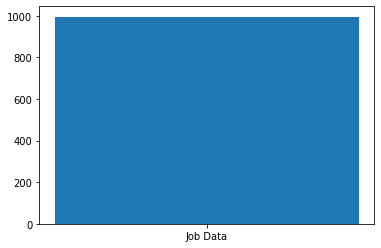

In [11]:
plt.bar("Job Data",data_csv["title"].value_counts())  # Check unique values in the title column

In [33]:
data_csv[["job_type","is_remote"]]

,job_type,is_remote
0,fulltime,1.0
1,fulltime,0.0
2,fulltime,0.0
3,NaN,0.0
4,fulltime,1.0
...,...,...
94524,NaN,0.0
94525,fulltime,0.0
94526,internship,0.0
94527,fulltime,1.0
